In [3]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

import math 

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 08.1/08.2

The first exercise asked to sample the wave function of a ground state of a single quantum particle in 1D space confined by a double-well potential of the shape $V(x) = x^4 - \frac{5}{2}x^2$. As this 1D quantum model is not analytically solvable, in order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. This trial function could be 
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

By using the Metropolis algorithm with an uniform transition probability $T(x_{new}|x_{old})$ and adjusting the amplitude of the intervall so that the acceptance rate is $\simeq 50$% it is easy to sample $|\Psi_T(x)|^2$. With this sampling we can compute the expectation value for the Hamiltonian $$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

By varying manually the variational parameters (I saved every time the results in the file *griglia_SigmaMu.out*) and watching how changed the value of $\langle {\hat H} \rangle_T$ it was possible to find the values of $\mu$ and $\sigma$ that minimize the average value of the Hamiltonian. Putting these values in the trial wave function we obtain the ground state wave function. 

The optimized values of $\sigma$ and $\mu$ are $0.61$ and $0.8$, respectively.

In the following plot we see the estimation of $\langle {\hat H} \rangle_T$ with the use of the blocking method. The number of steps used in total are $5x10^6$ divided in $100$ blocks. 

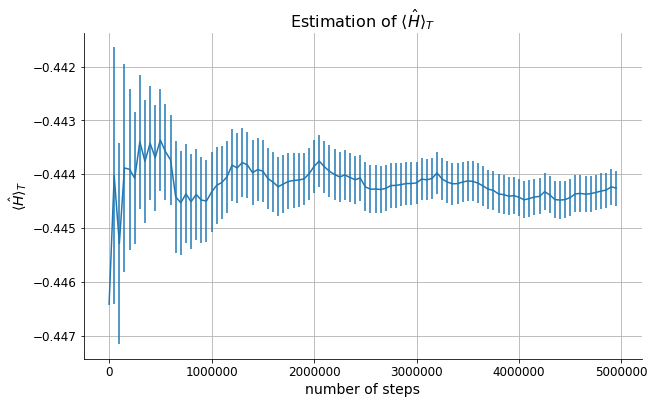

In [4]:
x, f, error = np.loadtxt("H_ave.out", usecols=(0,1,2), unpack='true')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(x,f,yerr=error)
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$\langle {\hat H} \rangle_T$")
plt.grid(True)
ax.set_title(r"Estimation of $\langle {\hat H} \rangle_T$");


The next plot shows a comparison between the histogram filled with the sampled configurations, the analytic curve of $|\Psi_T(x)|^2$ and the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (the code for this is the following Python script). 

In [5]:
def Vpot(x):
    return (x**2 - 2.5)*x**2

def psi_numerical(_x):
    hbar = 1
    m = 1
    a = 10 
    N = 1000

    dx = _x[1] - _x[0] 
    V = Vpot(_x)

    CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
    H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
    E,psi = np.linalg.eigh(H)
    psi = np.transpose(psi)
    psi = psi/np.sqrt(dx)

    #print("Ground state energy: ", E[0])
    #print("1st excited state energy: ", E[1])
    #print("2nd excited state energy: ", E[2])
    return psi[0]**2

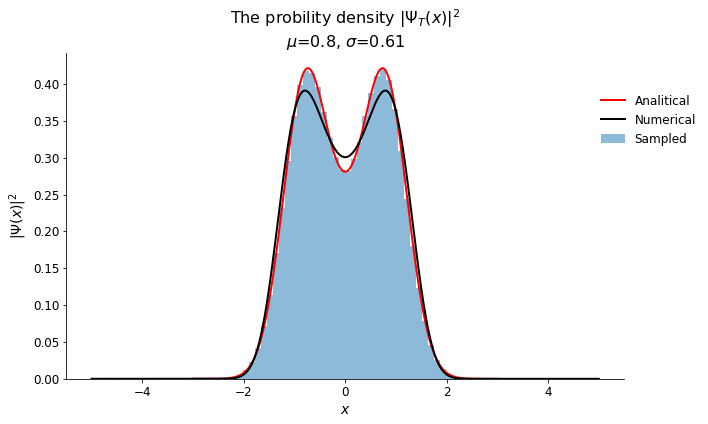

In [6]:
data = np.loadtxt("ProbDensity.xyz")

def psi(t,mu,sigma): 
    psi = math.exp(-(t-mu)**2/(2*(sigma**2))) + math.exp(-(t+mu)**2/(2*(sigma**2)))
    return ((psi)**2)/2.54962

x = np.linspace(-3,3,1001)
pdf_x = np.array([
    psi(t, 0.8, 0.61)
    for t in x 
])

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
_x = np.linspace(-10/2, 10/2, 1000)

bins = 50
ax.hist(data,bins=bins,density=True,label="Sampled",alpha=0.5);
ax.plot(x, pdf_x,color="red",lw=2,label="Analitical");
ax.plot(_x, psi_numerical(_x),color="black",lw=2,label="Numerical");
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ |\Psi(x)|^2$")
ax.legend(loc=(0.95, 0.7), frameon=False)
ax.set_title(f"The probility density $|\Psi_T(x)|^2$\n$\mu$=0.8, $\sigma$=0.61");

# Exercise 08.3

## PIGS 
In this exercise the first goal is to use the PIGS code to project on the ground state function a constant trial wave function, $\Psi_T(x)=1$, which is far from the real ground state function, and the function $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters optimized, which should be near the ground state. 

So, the only changes we need to apply to the original code for now are:
- changing the external potential (and its derivatives);
- changing the expression of $\Psi_T$ (and its second derivative).
- chianging the imaginary time propagation in the case of $\Psi_T^{\sigma,\mu}(x)$ to see how much we can reduce it with respect to the case of costant $\Psi_T(x)$


In the following plot we can see that the PIGS code reproduces well the numerical curve for both starting wave functions. 

Text(0.5, 0.98, 'PIGS - Gaussian $\\mu$=0.8, $\\sigma$=0.61')

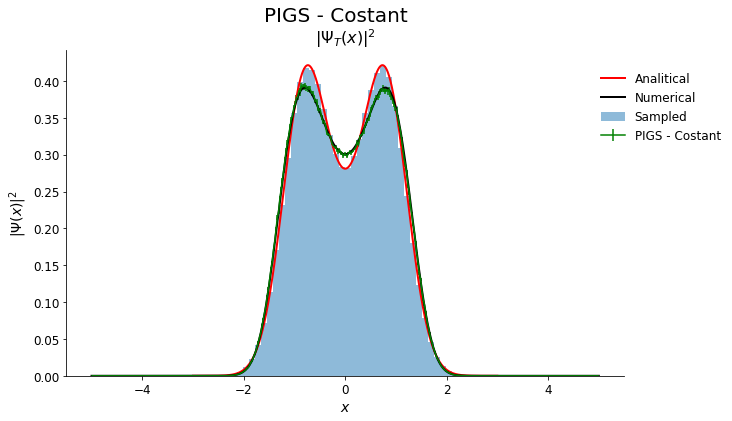

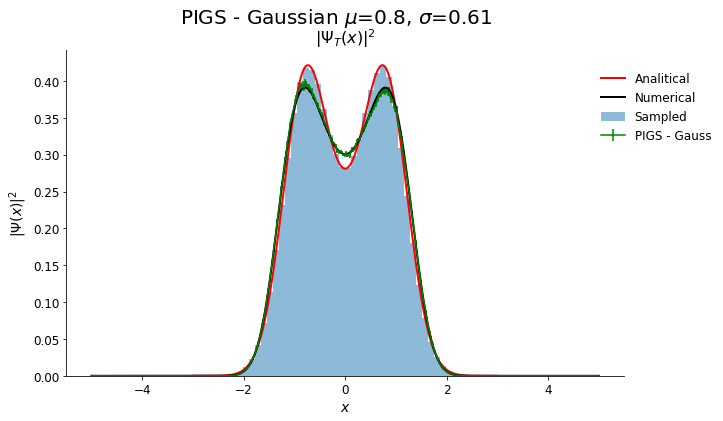

In [7]:
x_cost, psi_cost, cost_error = np.loadtxt("QMC_1D/probability_cost.dat", usecols=(0,1,2), unpack='true')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(data,bins=bins,density=True,label="Sampled",alpha=0.5);
ax.plot(x, pdf_x,color="red",lw=2,label="Analitical");
ax.plot(_x, psi_numerical(_x),color="black",lw=2,label="Numerical");
ax.errorbar(x_cost,psi_cost,cost_error,color='green', label = 'PIGS - Costant')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ |\Psi(x)|^2$")
ax.legend(loc=(0.95, 0.7), frameon=False)
ax.set_title(f"$|\Psi_T(x)|^2$");

fig.suptitle("PIGS - Costant",fontsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x_gauss_tau8, psi_gauss_tau8, error_gauss_tau8 = np.loadtxt("QMC_1D/probability_gauss_tau8.dat", usecols=(0,1,2), unpack='true')

ax.hist(data,bins=bins,density=True,label="Sampled",alpha=0.5);
ax.plot(x, pdf_x,color="red",lw=2,label="Analitical");
ax.plot(_x, psi_numerical(_x),color="black",lw=2,label="Numerical");
ax.errorbar(x_gauss_tau8,psi_gauss_tau8,error_gauss_tau8,color='green', label = 'PIGS - Gauss')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ |\Psi(x)|^2$")
ax.legend(loc=(0.95, 0.7), frameon=False)
ax.set_title(f"$|\Psi_T(x)|^2$");
fig.suptitle("PIGS - Gaussian $\mu$=0.8, $\sigma$=0.61",fontsize=20)

If we change the time propagation $\tau$ in the case of $\Psi_T^{\sigma,\mu}(x)$ we notice from the following plot that the minimum value of $\tau$ that still conserves the matching with the numerical solution is equal to $2$.

Text(0.5, 0.98, 'Comparison of $|\\Psi_T(x)|^2$ obtained with different $\\tau$')

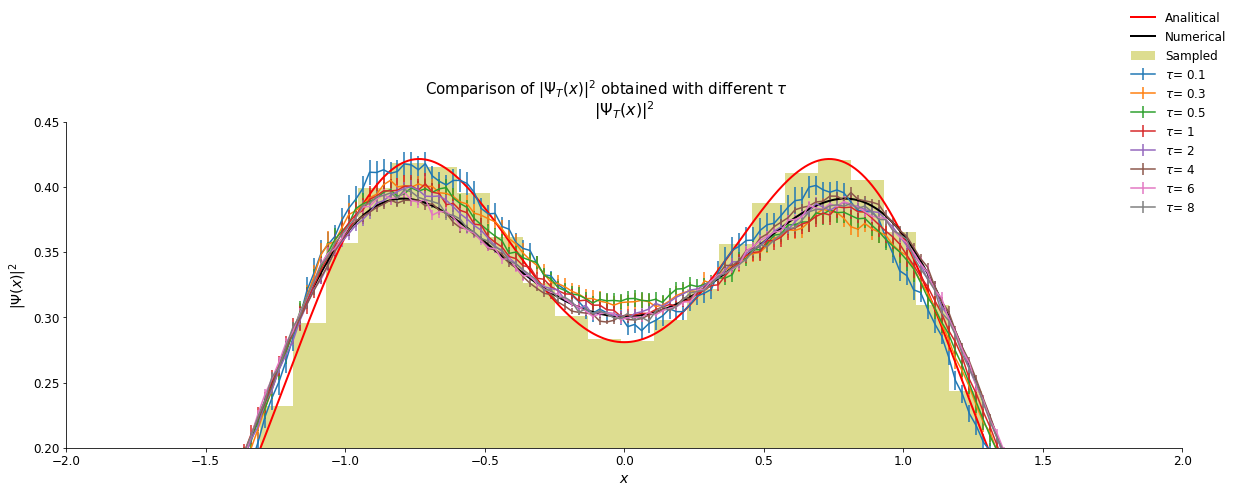

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

x_gauss_tau=np.zeros((8,400))
psi_gauss_tau =np.zeros((8,400))
error_gauss_tau = np.zeros((8,400))
tau=[0.1,0.3,0.5,1,2,4,6,8]

for i in range(8):
    x_gauss_tau[i,:], psi_gauss_tau[i,:], error_gauss_tau[i,:] = np.loadtxt(f"QMC_1D/probability_gauss_tau{tau[i]}.dat", usecols=(0,1,2), unpack='true')

for i in range(8):
    ax.errorbar(x_gauss_tau[i,:],psi_gauss_tau[i,:],error_gauss_tau[i,:], label = r"$\tau$" f"= {tau[i]}")
    
ax.hist(data,bins=bins,density=True,label="Sampled",alpha=0.5);
ax.plot(x, pdf_x,color="red",lw=2,label="Analitical");
ax.plot(_x, psi_numerical(_x),color="black",lw=2,label="Numerical");
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ |\Psi(x)|^2$")
ax.set_xlim(-2,2)
ax.set_ylim(0.20,0.45)
ax.legend(loc=(0.95, 0.7), frameon=False)
ax.set_title(f"$|\Psi_T(x)|^2$");
fig.suptitle(r"Comparison of $|\Psi_T(x)|^2$ obtained with different $\tau$",fontsize=15)

## PIMC
The last request is to change the temperature in the PIMC code and see what happens. From the following plot we can see that as the temperature increases the wave function becomes larger and, then, flatter: this is because at temperature different from zero it's possible to occupy states that have more energy than the ground state. 

Text(0.5, 0.98, 'Comparison of $|\\Psi_T(x)|^2$ obtained with different T')

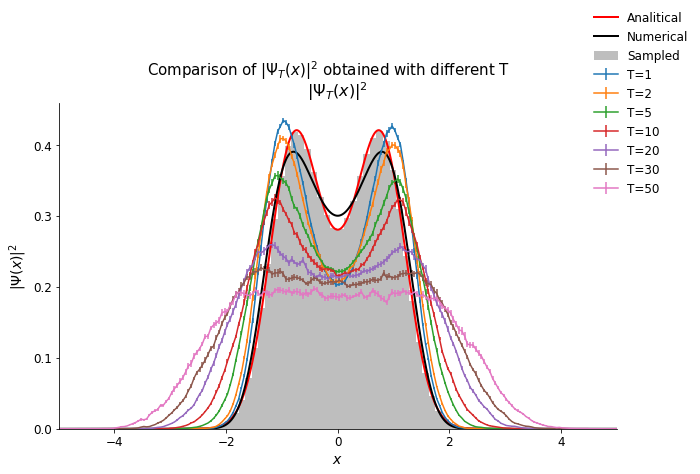

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x_gauss_T=np.zeros((7,400))
psi_gauss_T =np.zeros((7,400))
error_gauss_T = np.zeros((8,400))
T=[1,2,5,10,20,30,50]

for i in range(7):
    x_gauss_T[i,:], psi_gauss_T[i,:], error_gauss_T[i,:] = np.loadtxt(f"QMC_1D/probability_T{T[i]}.dat", usecols=(0,1,2), unpack='true')

for i in range(7):
    ax.errorbar(x_gauss_T[i,:],psi_gauss_T[i,:],error_gauss_T[i,:], label = f"T={T[i]}")
    
ax.hist(data,bins=bins,density=True,label="Sampled",alpha=0.5);
ax.plot(x, pdf_x,color="red",lw=2,label="Analitical");
ax.plot(_x, psi_numerical(_x),color="black",lw=2,label="Numerical");
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ |\Psi(x)|^2$")
ax.set_xlim(-5,5)
#ax.set_ylim(0.20,0.45)
ax.legend(loc=(0.95, 0.7), frameon=False)
ax.set_title(f"$|\Psi_T(x)|^2$");
fig.suptitle(r"Comparison of $|\Psi_T(x)|^2$ obtained with different T",fontsize=15)